In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
node_roles = pd.read_csv("../graphs/node_roles.csv")

In [3]:
print(node_roles.columns)
print(node_roles.roles)

Index(['Unnamed: 0', 'external_edges(mean)(mean)(mean)(mean)(mean)',
       'external_edges(mean)(mean)(mean)(mean)',
       'in_degree(mean)(mean)(mean)(mean)', 'external_edges(mean)(mean)(mean)',
       'external_edges(sum)(mean)(mean)', 'in_degree(mean)(mean)(mean)',
       'internal_edges(mean)(mean)(mean)', 'external_edges(mean)(mean)',
       'external_edges(sum)(mean)', 'in_degree(mean)(mean)',
       'internal_edges(mean)(mean)', 'out_degree(mean)(mean)',
       'external_edges(mean)', 'external_edges(sum)', 'in_degree(mean)',
       'internal_edges(mean)', 'out_degree(mean)', 'total_degree(mean)',
       'external_edges', 'in_degree', 'internal_edges', 'out_degree',
       'total_degree', 'roles', 'pagerank'],
      dtype='object')
0       role_1
1       role_6
2       role_1
3       role_6
4       role_4
         ...  
3287    role_0
3288    role_6
3289    role_0
3290    role_1
3291    role_0
Name: roles, Length: 3292, dtype: object


In [4]:
grouped_feat = node_roles.groupby('roles').mean()
print(grouped_feat)

        external_edges(mean)(mean)(mean)(mean)(mean)  \
roles                                                  
role_0                                  14379.842581   
role_1                                 141485.872804   
role_2                                 147282.851756   
role_3                                 138997.465204   
role_4                                 126502.187412   
role_5                                 145885.545762   
role_6                                 140356.299378   
role_7                                 139858.375776   

        external_edges(mean)(mean)(mean)(mean)  \
roles                                            
role_0                            14261.455356   
role_1                           141852.190005   
role_2                           150182.522883   
role_3                           139336.035240   
role_4                           121464.547492   
role_5                           148312.682939   
role_6                           140292

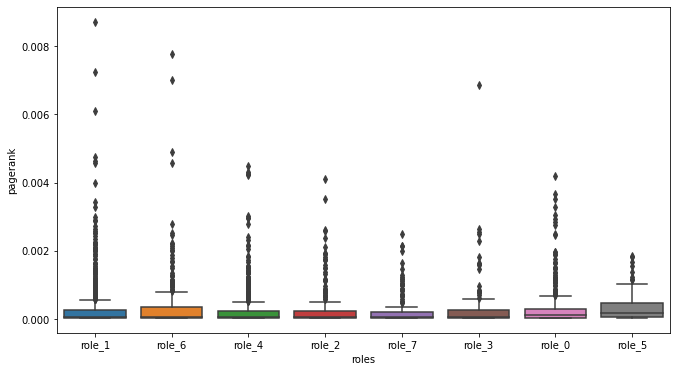

In [7]:
f, ax = plt.subplots(figsize=(11, 6))
ax.set(xlabel="pagerank")
# Draw a violinplot with a narrower bandwidth than the default
sns.boxplot(x=node_roles["roles"], y=node_roles["pagerank"])
f.savefig("../plots/pagerank.png")

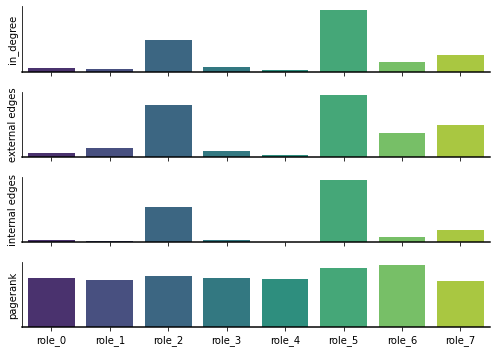

In [6]:
# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(7, 5), sharex=True)

x = np.array(list(grouped_feat.index))
sns.barplot(x=x, y=grouped_feat["in_degree"], palette="viridis", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("in_degree")

sns.barplot(x=x, y=grouped_feat["external_edges"], palette="viridis", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("external edges")

sns.barplot(x=x, y=grouped_feat["internal_edges"], palette="viridis", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("internal edges")

sns.barplot(x=x, y=grouped_feat["pagerank"], palette="viridis", ax=ax4)
ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylabel("pagerank")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
f.savefig("../plots/role_features.png")